## Photometry Cookbook
This notebook will represent a standard cookbook for performing SLUGGS survey photometry on ground-based data.

In [1]:
#standard imports
%matplotlib inline
import seWrapper
from imp import reload
import os
import matplotlib.pyplot as plt
import numpy as np
reload(seWrapper)

import pandas as pd

/Users/zjennings/anaconda/envs/astro/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/zjennings/anaconda/envs/astro/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
g_band_data = pd.read_csv('ngvs_bg_1_g_final.csv')
r_band_data = pd.read_csv('ngvs_bg_1_r_final.csv')
i_band_data = pd.read_csv('ngvs_bg_1_i_final.csv')

In [3]:
se_g = seWrapper.seCatalog()
se_g.create_new_catalog_arrs(g_band_data['ra'],\
                        g_band_data['dec'],\
                           fil='g',\
                        mags = g_band_data['mag'],
                        fwhm = g_band_data['fwhm'],
                       flags = g_band_data['flag'],
                       ellipticity = g_band_data['ellip'],
                        merr = g_band_data['merr'])

In [4]:
se_r = seWrapper.seCatalog()
se_r.create_new_catalog_arrs(r_band_data['ra'],\
                        r_band_data['dec'],\
                           fil='r',\
                        mags = r_band_data['mag'],
                        fwhm = r_band_data['fwhm'],
                       flags = r_band_data['flag'],
                       ellipticity = r_band_data['ellip'],
                            merr = r_band_data['merr'])

In [5]:
se_i = seWrapper.seCatalog()
se_i.create_new_catalog_arrs(i_band_data['ra'],\
                        i_band_data['dec'],\
                           fil='i',\
                        mags = i_band_data['mag'],
                        fwhm = i_band_data['fwhm'],
                       flags = i_band_data['flag'],
                       ellipticity = i_band_data['ellip'],
                            merr = i_band_data['merr'])

In [6]:
se_g.mergeCatalog(se_r)


In [7]:
se_g.mergeCatalog(se_i)

In [8]:
all_detections = (se_g.mags['g'] < 90) & (se_g.mags['r'] < 90) & (se_g.mags['i'] < 90) 

In [9]:
gi_all_detections = se_g.mags['g'][all_detections] - se_g.mags['i'][all_detections]

In [10]:
se_g.coords.ra.degree

array([ 202.1237558,  202.6203711,  201.8478604, ...,  201.685999 ,
        202.1212173,  202.1970872])

In [11]:
#Now that catalogs are joined, put everything in a pandas data frame. Note that if I had written
#my catalog code a year later, it would be written with the intention of doing this from the beginning...
catalog_dict = {}

#get the ra and dec from the coordinate object and place them in a pandas series
catalog_dict['ra'] = pd.Series(se_g.coords.ra.degree)
catalog_dict['dec'] = pd.Series(se_g.coords.dec.degree)

#put the mags in pandas series:
catalog_dict['g_mag'] = pd.Series(se_g.mags['g'])
catalog_dict['r_mag'] = pd.Series(se_g.mags['r'])
catalog_dict['i_mag'] = pd.Series(se_g.mags['i'])

#same for the merrs:
catalog_dict['g_merr'] = pd.Series(se_g.merr['g'])
catalog_dict['r_merr'] = pd.Series(se_g.merr['r'])
catalog_dict['i_merr'] = pd.Series(se_g.merr['i'])

#same for the fwhm:
catalog_dict['g_fwhm'] = pd.Series(se_g.fwhm['g'])
catalog_dict['r_fwhm'] = pd.Series(se_g.fwhm['r'])
catalog_dict['i_fwhm'] = pd.Series(se_g.fwhm['i'])

#same for the ellipticity:
catalog_dict['g_ellip'] = pd.Series(se_g.ellipticity['g'])
catalog_dict['r_ellip'] = pd.Series(se_g.ellipticity['r'])
catalog_dict['i_ellip'] = pd.Series(se_g.ellipticity['i'])

#same for the flags:
catalog_dict['g_flags'] = pd.Series(se_g.flags['g'])
catalog_dict['r_flags'] = pd.Series(se_g.flags['r'])
catalog_dict['i_flags'] = pd.Series(se_g.flags['i'])

In [12]:
catalog = pd.DataFrame(catalog_dict)

In [13]:
catalog.to_csv('ngvs_bg1_phot_combined.csv')

In [14]:
detected = (catalog['g_mag'] < 90) & (catalog['r_mag'] < 90) & (catalog['i_mag'] < 90)

In [15]:
detections = catalog.ix[detected,:]

In [16]:
good_source = (detections['i_fwhm'] > 2.5) & (detections['i_fwhm'] < 3.0)
good_sources = detections.ix[good_source,:]

(-0.5, 1.0)

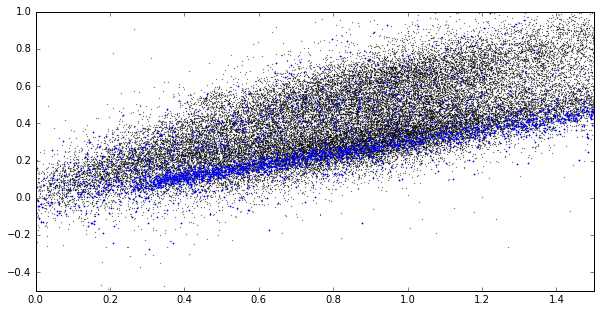

In [17]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(detections['g_mag'] - detections['i_mag'], detections['r_mag'] - detections['i_mag'],s=0.05)
ax.scatter(good_sources['g_mag'] - good_sources['i_mag'], good_sources['r_mag'] - good_sources['i_mag'],\
           color='b',s=0.5)

ax.set_xlim(0.0,1.5)
ax.set_ylim(-0.5,1.0)

### Steps:
1. Use the aperture correction cookbook to calculate aperture corrections for each filter. 
2. Use the zero-point cookbook to calculate zero-points for each filter. (not ready yet)
3. Use the completeness curve cookbook to calculate completeness curves for each filter. 
4. Combine all photometry into a single catalog file using this notebook.
5. Calculate final zero-points by comparing the color-color distributions of sample foreground star populations with those observed in the data. 

### 1. Calculate the aperture corrections for each  filter.
Standard procedure will be to create an individual aperture correction notebook for each filter. Follow the "aperture_correction_cookbook.ipynb" format. Record the aperture corrections both below and on the google spreadsheet, and commit the notebooks to show work.

In [3]:
#aperture corrections:
g_band_apr_cor = 0.3
r_band_aper_cor = 0.3
i_band_aper_cor = 0.3

### 2. Calculate initial zero-points for each filter. 
For galaxies that overlap with SDSS, we will calculate zero-points with overlapping SDSS photometry. Use the sdss_zero_point_cookbook.ipynb to calculate this.

In [2]:
#zero-points
g_band_zpt = 30.
r_band_zpt = 30.
i_band_zpt = 30.

### 3. Calculate the completeness curves for each filter. 
Re-run photometry with new zero-points used, for convenience sake. Then use the fake_star_notebook to perform fake star photometry. Then use the completeness curve notebook to calculate completeness curves and save the completeness object as a pickle.

### 4. Combine the catalogs using the code below.

In [15]:
se = seWrapper.seCatalog()

In [22]:
se_g = seWrapper.seCatalog()
se_g.create_new_catalog_file('ngvs_bg_2_g_final.csv',filter='g')
se_r = seWrapper.seCatalog()
se_r.create_new_catalog_file('ngvs_bg_2_r_final.csv',filter='r')
se_i = seWrapper.seCatalog()
se_i.create_new_catalog_file('ngvs_bg_2_i_final.csv',filter='i')

ValueError: could not convert string to float: 

In [26]:
data = np.loadtxt('ngvs_bg_2_g_final.csv',delimiter=',',dtype='str')

In [31]:
new_catalog = pd.read_csv('ngvs_bg_2_g_final.csv')

In [34]:
bad = new_catalog['mag'] > 90

In [38]:
new_catalog_cut = new_catalog.ix[~bad,:]

In [39]:
new_catalog_cut

,Unnamed: 0,ra,dec,mag,merr,fwhm,ellip,flag
0,0,181.233028,26.832466,26.1346,0.2502,0.0,0.207,4
1,1,181.213433,26.832490,26.3272,0.2863,0.0,0.505,4
3,3,181.176011,26.832615,30.4840,9.6262,0.0,0.346,4
4,4,181.163832,26.832683,27.0291,0.4807,0.0,0.383,6
5,5,181.275251,26.832531,25.6579,0.1831,0.0,0.739,4
6,6,181.140594,26.832592,26.5537,0.3365,0.0,0.240,4
7,7,181.249508,26.832487,25.4978,0.1656,0.0,0.150,4
8,8,181.178630,26.832522,27.2405,0.5672,0.0,0.414,4
9,9,181.254735,26.832664,25.9563,0.2221,0.0,0.691,4
10,10,181.072861,26.832689,26.6038,0.3490,0.0,0.319,4


In [94]:
directory = 'field_1/'
file = directory+'NGVS_BG_1.G.fits'
os.system("sex -c g.sex " + file)

0

In [116]:
np.sum(se_g.mags['g'] < 99)

212763

In [66]:
good = (se.mags['g'] < 90) & (se.mags['g_noback'] < 90)

In [67]:
diffs = se.mags['g'][good] - se.mags['g_noback'][good]

In [50]:
foo = {'foo_1':0.0,'foo_2':1.0,'foo_3':2.0}

(-2, 2)

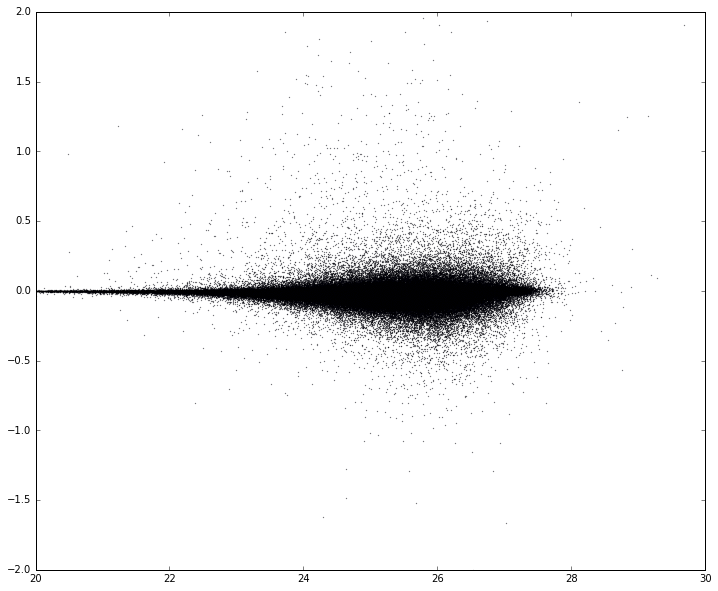

In [72]:
fig,ax = plt.subplots(figsize=(12,10))
ax.scatter(se.mags['g'][good],diffs,s=0.05)
ax.set_xlim(20,30)
ax.set_ylim(-2,2)

In [73]:
foo = dict()

In [78]:
foo['a'] = 0.0
foo['b'] = 1.0
foo['c'] = 2.0

In [88]:
keys = foo.keys()
for i in range(len(list(keys))):
    print(foo[list(keys)[i]])

0.0
1.0
2.0


In [ ]:
for i in range(len(list(keys))):
    truth[:,i] = self.mags[list(keys)[i]] < 99

In [117]:
good_sources = (se_g.mags['g'] < 99) & \
        (se_g.mags['r'] < 99) & \
        (se_g.mags['i'] < 99) & \
        (se_g.flags['g'] < 1) & \
        (se_g.flags['r'] < 1) &\
        (se_g.flags['i'] < 1)

In [119]:
np.sum(good_sources)

80791

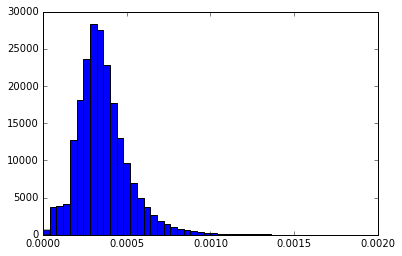

In [134]:
hist = plt.hist(se_g.fwhm['g'],range=(0,0.002),bins=50)